# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import requests
import time
import datetime
import gmaps
from config import api_key_weather,gkey
from citipy import citipy

# Output File (CSV)
output_data_file = ".\\Output\\citiesweather.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

662

### Perform API Calls

In [3]:
def divide_chunks(list,num):
    '''
    This function divides a list into seperate lists, yielding n-sized chunks.
    This function takes in (list) a list to be split and (num) the number of instances desired per new list.
    Please note that both parameters are required.
    '''
    for i in range(0,len(list),num):
        yield list[i:i+num]

city_lists = list(divide_chunks(cities,60))
cities_df = DataFrame(cities)
cities_df.head()

,0
0,kavaratti
1,east london
2,makakilo city
3,marcona
4,svetlaya


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params={"units":"imperial","appid":api_key_weather}
city_count = 1
set_count = 1
row_count = 0
not_found = []

print("Beginning Data Retrival\n-----------------------------")
for x in range(len(city_lists)):
    for y in range(len(city_lists[x])):
        start_time = time.time()
        tar_city = city_lists[x][y]
        params["q"] = tar_city
        
        # assemble url and make API request
        response = requests.get(base_url,params=params).json()
              
        # extract results 
        try: 
            main = response["main"]
            coord = response["coord"]
            
            print(f"Processing Record {city_count} of Set {set_count} | {tar_city}")
            cities_df.loc[row_count,'City'] = response.get("name",'')
            cities_df.loc[row_count,'Cloudiness'] = response["clouds"].get("all",'')
            cities_df.loc[row_count,'Country'] = response["sys"].get("country",'')
            cities_df.loc[row_count,'Country Date'] = response.get("dt",'')
            cities_df.loc[row_count,'Humidity'] = main.get("humidity",'')
            cities_df.loc[row_count,'Lat'] = coord.get("lat",'')     
            cities_df.loc[row_count,'Lng'] = coord.get('lon','')
            cities_df.loc[row_count,'Max Temp'] = main.get("temp_max",'')
            cities_df.loc[row_count,'Wind Speed'] = response["wind"].get("speed",'')
            row_count += 1
        
        except KeyError:
            print(f"{tar_city} not found. Skipping...")
            not_found.append(tar_city)
                  
        city_count += 1 
                  
    time.sleep(60)   
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"set {set_count} ran in {elapsed} seconds")
    set_count += 1
    city_count = 1
    
print(f"-----------------------------\nData Retrieval Complete\n{len(not_found)} Records Not Found\n-----------------------------")

Beginning Data Retrival
-----------------------------
Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | makakilo city
marcona not found. Skipping...
Processing Record 5 of Set 1 | svetlaya
Processing Record 6 of Set 1 | novoagansk
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | rio negro
Processing Record 11 of Set 1 | batagay
Processing Record 12 of Set 1 | mayumba
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | nikolskoye
attawapiskat not found. Skipping...
belushya guba not found. Skipping...
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | tabuk
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | san javier
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | bonfim
Processing Record 23 of Set 1 | wanaka
Processing Recor

Processing Record 43 of Set 7 | popondetta
Processing Record 44 of Set 7 | jijiga
Processing Record 45 of Set 7 | porto novo
Processing Record 46 of Set 7 | fort saint james
Processing Record 47 of Set 7 | maniitsoq
Processing Record 48 of Set 7 | auki
Processing Record 49 of Set 7 | padang
Processing Record 50 of Set 7 | sao filipe
Processing Record 51 of Set 7 | santo antonio do leverger
Processing Record 52 of Set 7 | ewa beach
Processing Record 53 of Set 7 | ganzhou
Processing Record 54 of Set 7 | sikasso
Processing Record 55 of Set 7 | tahoua
Processing Record 56 of Set 7 | marand
Processing Record 57 of Set 7 | davila
Processing Record 58 of Set 7 | dingle
Processing Record 59 of Set 7 | wilmington
Processing Record 60 of Set 7 | inuvik
set 7 ran in 60.2249174118042 seconds
Processing Record 1 of Set 8 | suluq
Processing Record 2 of Set 8 | los llanos de aridane
Processing Record 3 of Set 8 | xai-xai
Processing Record 4 of Set 8 | chokurdakh
Processing Record 5 of Set 8 | corinto

Processing Record 2 of Set 11 | ouadda
odweyne not found. Skipping...
Processing Record 4 of Set 11 | nome
Processing Record 5 of Set 11 | lalmohan
Processing Record 6 of Set 11 | champerico
Processing Record 7 of Set 11 | sept-iles
Processing Record 8 of Set 11 | iqaluit
Processing Record 9 of Set 11 | senador jose porfirio
Processing Record 10 of Set 11 | urrao
Processing Record 11 of Set 11 | ler
Processing Record 12 of Set 11 | victoria
Processing Record 13 of Set 11 | mamakan
Processing Record 14 of Set 11 | denpasar
Processing Record 15 of Set 11 | bam
Processing Record 16 of Set 11 | kamskoye ustye
Processing Record 17 of Set 11 | lieksa
Processing Record 18 of Set 11 | aldan
Processing Record 19 of Set 11 | yurla
Processing Record 20 of Set 11 | craig
Processing Record 21 of Set 11 | adrar
Processing Record 22 of Set 11 | kuala terengganu
Processing Record 23 of Set 11 | waipawa
Processing Record 24 of Set 11 | ayan
Processing Record 25 of Set 11 | pilar
Processing Record 26 of

### Convert Raw Data to DataFrame

In [5]:
cities_df.drop([0],axis=1,inplace=True)
cities_df.dropna(inplace=True)
cities_df_type = cities_df.astype({"Cloudiness": int, "Country Date": int,"Humidity": int})
cities_df_type.to_csv(output_data_file, encoding="utf-8", index=False)
cities_df_type.head()

,City,Cloudiness,Country,Country Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kavaratti,0,IN,1553122384,100,10.57,72.64,82.38,3.96
1,East London,88,ZA,1553122384,100,-33.02,27.91,69.69,11.90
2,Makakilo City,20,US,1553122117,44,21.35,-158.09,80.60,9.17
3,Svetlaya,92,RU,1553122385,100,46.54,138.33,24.42,18.05
4,Novoagansk,48,RU,1553122385,78,61.94,76.66,25.95,9.33


### Plotting the Data

#### Latitude vs. Temperature Plot

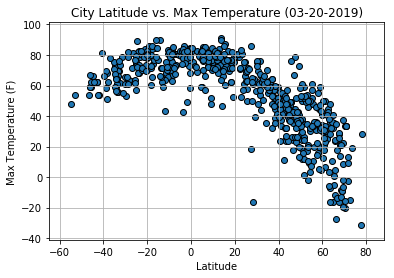

In [6]:
x_axis = cities_df_type["Lat"]
y_axis = cities_df_type["Max Temp"]

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid(b=True)
plt.title(f"City Latitude vs. Max Temperature ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig(".\\Output\\latvtemp.png")

#### Latitude vs. Humidity Plot

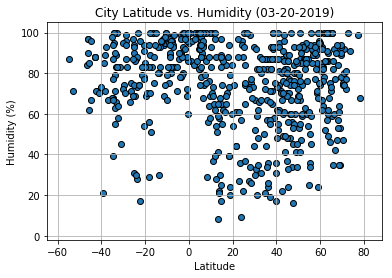

In [7]:
y_axis = cities_df["Humidity"]

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(min(y_axis)-10,105)
plt.grid(b=True)
plt.title(f"City Latitude vs. Humidity ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig(".\\Output\\latvhumd.png")

#### Latitude vs. Cloudiness Plot

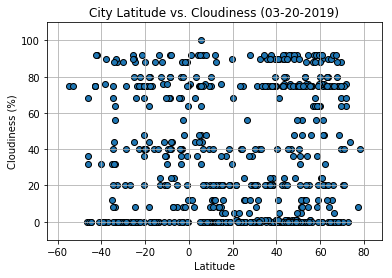

In [8]:
y_axis = cities_df_type["Cloudiness"]

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid(b=True)
plt.title(f"City Latitude vs. Cloudiness ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig(".\\Output\\latvcloud.png")

#### Latitude vs. Wind Speed Plot

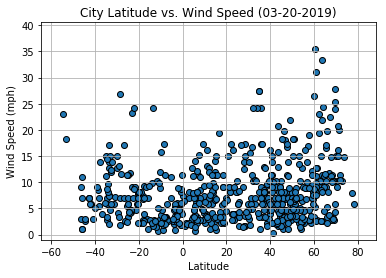

In [9]:
y_axis = cities_df_type["Wind Speed"]

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(-1,max(y_axis)+5)
plt.grid(b=True)
plt.title(f"City Latitude vs. Wind Speed ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig(".\\Output\\latvwind.png")

### Cities found in API laid over with gmap

<function matplotlib.pyplot.show(*args, **kw)>

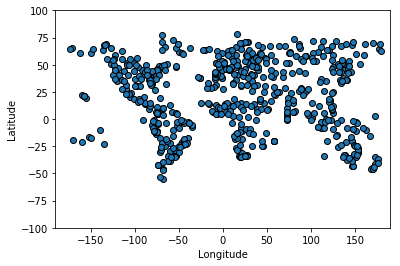

In [10]:
lat_here = cities_df_type["Lat"]
lng_here = cities_df_type["Lng"]

plt.ylim(-100,100)
plt.xlim(-190,190)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(lng_here,lat_here,edgecolors='k')
plt.show

In [11]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Create symbol layer
locations = cities_df_type[["Lat", "Lng"]].astype(float)
cities_layer = gmaps.symbol_layer(
    locations, fill_color='black', scale=2)

fig = gmaps.figure()
fig.add_layer(cities_layer)

fig
#Download as png with button below

Figure(layout=FigureLayout(height='420px'))